### Photon Orbits in Schwarzschild Metric with Semiclassical Corrections

$$ \left(\dfrac{dx}{d\phi}\right)^2=G(x)\equiv G_0(x)+\tilde{t}H(x)\implies\dfrac{d^2x}{d\phi^2}=\dfrac{G_0'(x)+\tilde{t}H'(x)}{2} $$

We can get two coupled-first-order ODEs as below :

$$ \dfrac{dx}{d\phi}=v $$
$$ \dfrac{dv}{d\phi}=\dfrac{G_0'(x)+\tilde{t}H'(x)}{2} $$

Also we can define $\zeta^2$ as :

$$ \zeta^2=\dfrac{r_s^2}{b^2} $$

But $$ b^2=\dfrac{P^3}{P-r_s} $$
So, we have :

$$ \zeta^2 = \dfrac{r_s^2(P-r_s)}{P^3} $$

In [917]:
import numpy as np
import matplotlib.pyplot as plt

In [918]:
r_s = 1

# Perturbation Parameters

t_tilde = 10**-9
delta = 9.682*10**-10

# Initial Conditions (corrected metric)

r0 = (1.5 + delta)*r_s                                  # Initial Radial Position
# r0=1/(1/(1.5*r_s)-2.03/(4.5*r_s)*t_tilde)             # Critical value
x0 = r_s/r0
v0 = 0                                                  # Initial Radial Velocity
y_ini = np.array([x0,v0])

# Time step

h = 0.001

In [919]:
# Defining the derivative function (for corrected metric)
# here x = angular position (phi)
# and y = radial position (r)

def zeta_sq(x):
    return r_s**2*(r0-r_s)/r0**3

def G0(x):
    return x**3-x**2+zeta_sq(x)

def coth1(x):
    return 0.57561*x**3-0.16*x**2+0.008*x+1             # Approximation of coth(1/x) using polynomial interpolation

def dcoth1(x):
    return 1.72683*x**2-0.32*x+0.008

def coth2(x):
    return 0.10125*x**2-0.03375*x+1             # Approximation of coth(1/x^2) using polynomial interpolation

def dcoth2(x):
    return 0.2025*x-0.03375

def htt(x):
    return -2*x**3*(x**2-coth2(x))

def dhtt(x):
    return -6*x**2*(x**2-coth2(x))-2*x**3*(2*x-dcoth2(x))

def hphiphi(x):
    return -2*r_s**2/x*(x-coth1(x))

def dhphiphi(x):
    return -2*r_s**2/x*(1-dcoth1(x))+2*r_s**2/x**2*(x-coth1(x))

def hrr(x):
    return -2*x**2/(1-x)**2*(x**2-coth2(x))

def dhrr(x):
    return -2*x**2/(1-x)**2*(2*x-dcoth2(x))-4*x/(1-x)**3*(x**2-coth2(x))

def H(x):
    return G0(x)*((1-x)*hrr(x)-x**2/r_s**2*hphiphi(x))+zeta_sq(x)*(hphiphi(x)*x**2/r_s**2+htt(x)/(1-x))

def dG0(x):
    return 3*x**2-2*x

def dH(x):
    t1 = dG0(x)*((1-x)*hrr(x)-x**2/r_s**2*hphiphi(x))+G0(x)*(-hrr(x)+(1-x)*dhrr(x)-x**2/r_s**2*dhphiphi(x)-2*x/r_s**2*hphiphi(x))
    t2 = zeta_sq(x)*(dhphiphi(x)*x**2/r_s**2+hphiphi(x)*2*x/r_s**2+dhtt(x)/(1-x)+htt(x)/(1-x)**2)
    return t1+t2

def ddx(x,y):
    u = y[0]
    v = y[1]
    return np.array([v,0.5*(dG0(u)+t_tilde*dH(u))])

In [920]:
# Defining RK4 method

def rk4(f,x,y,h):
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

In [921]:
# Defining the Caller function

def Caller(mtd,f,xs,y_ini,h):
    N = len(xs)
    y = y_ini
    ys = np.zeros((N,2),float)
    for i in range(N):
        x = xs[i]
        ys[i] = y
        y = mtd(ddx,x,y,h)
    return ys

In [922]:
# Getting a solution (for corrected metric)

n = 4                                       # Number of full circles

xs = np.arange(0,2*np.pi*n,h)                # Stores the angular coordinates
ys = Caller(rk4,ddx,xs,y_ini,h)              # Stores the radial coordinates and radial velocities

r = r_s/ys[:,0]                                  # Stores just the radial coordinates
# r = r/(1*AU)                                 # Normalizes the radial distance w.r.t. 1 A.U.

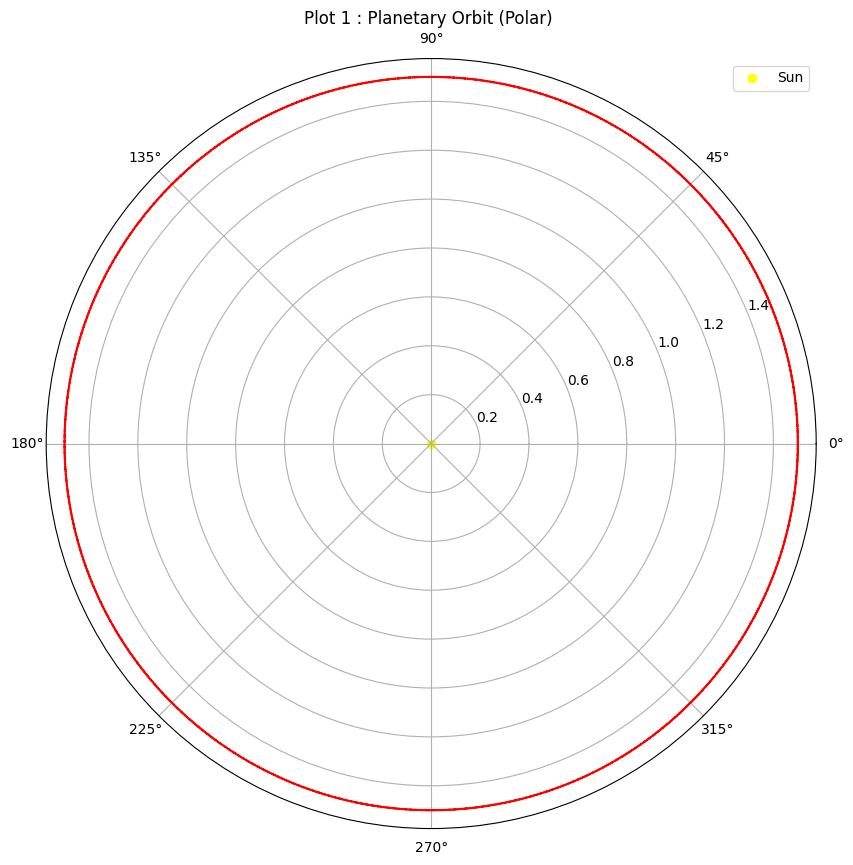

In [923]:
# Visualizing the Polar Plot (for corrected metric)

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar = True)
ax.plot(xs,r,linestyle = "dotted",c = "red")
ax.scatter([0],[0],label="Sun",c="Yellow",marker = "o")
plt.title("Plot 1 : Planetary Orbit (Polar) ")
plt.legend()
plt.show()

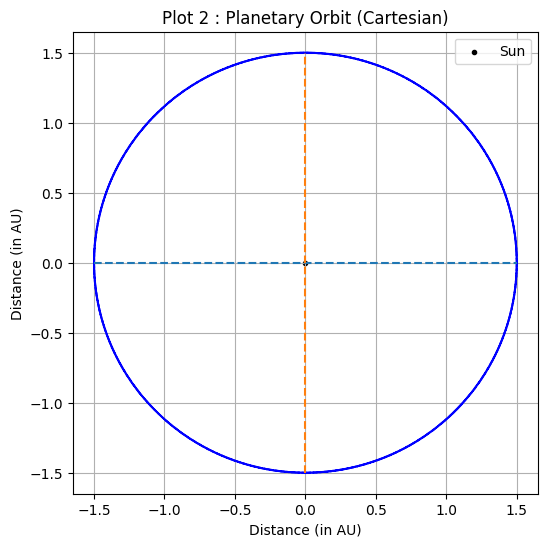

In [924]:
# In Cartesian Coodinates

x_ax = np.zeros((len(r),),float)
y_ax = np.zeros((len(r),),float)

l = 0

for i in range(len(r)):
    x_ax[i]=r[i]*np.cos(xs[i])
    y_ax[i]=r[i]*np.sin(xs[i])
    if l<abs(x_ax[i]):
        l=abs(x_ax[i])
    if l<abs(y_ax[i]):
        l=abs(y_ax[i])


plt.figure(figsize=(6,6))
plt.plot(x_ax,y_ax,c='blue',linestyle = 'dotted')
plt.plot([-l,l],[0,0],linestyle = 'dashed')
plt.plot([0,0],[-l,l],linestyle = 'dashed')
plt.scatter([0],[0],marker='.',c='black',label="Sun")
plt.xlabel("Distance (in AU)")
plt.ylabel("Distance (in AU)")
plt.title("Plot 2 : Planetary Orbit (Cartesian)")
plt.grid()
plt.legend()
plt.show()

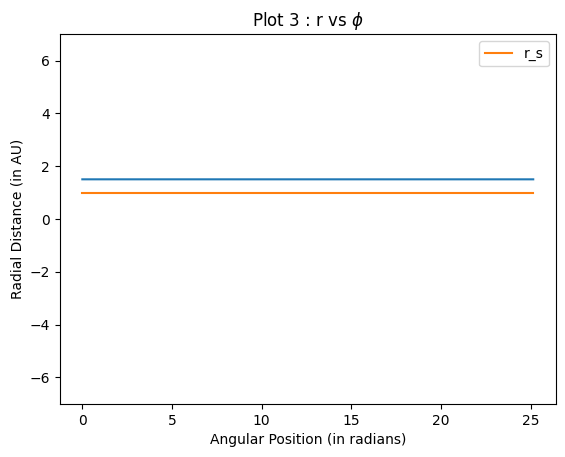

In [925]:
# Radial Distance vs phi plot

plt.plot(xs,r)
plt.plot([0,max(xs)],[r_s,r_s],label = "r_s")
plt.title("Plot 3 : r vs $\phi$")
plt.xlabel("Angular Position (in radians)")
plt.ylabel("Radial Distance (in AU)")
plt.ylim(-r_s*7,r_s*7)
plt.legend()
plt.show()

In [926]:
# print(r)

# print("Distance of Closest Approach =",AU*min(abs(r)),"km")
# print("Schwarzschild Radius, r_s =",r_s)
# print(len(r))

# if r_s<AU*min(abs(r)):
#     print("\n The photon didn't fall in the blackhole.")
# else:
#     print("\n The photon fell inside the blackhole.")

# for i in range(len(r)):
#     if abs(r[i])>r[0]:
#         print(i)
#         print(i*h)
#         break

In [927]:
# # Finer Picture of the orbit 
# # ZOOM IN THE PLOT USING THE PARAMETER 'q'
 
# plt.figure(figsize=(12,6))

# pps = np.arange(0,2*np.pi+0.01,0.01)
# xxs = [r_s/AU*np.cos(i) for i in pps]
# yys = [r_s/AU*np.sin(i) for i in pps]

# plt.subplot(1,2,1)

# q_1 = 6.6                              # Increase this number to zoom into the plot

# plt.plot(xxs,yys,c='red')
# plt.plot(x_ax,y_ax,c='blue',linestyle = 'dotted')
# plt.plot([-l,l],[0,0],linestyle = 'dashed')
# plt.plot([0,0],[-l,l],linestyle = 'dashed')
# plt.scatter([0],[0],marker='.',c='black',label="Sun")
# plt.xlabel("Distance (in AU)")
# plt.ylabel("Distance (in AU)")
# plt.title("Plot 4.a : Planetary Orbit (Zoomed)")
# plt.xlim(-10**-q_1,10**-q_1)
# plt.ylim(-10**-q_1,10**-q_1)
# plt.grid()
# plt.legend()

# plt.subplot(1,2,2)

# q_2 = 7.2                               # Increase this number to zoom into the plot

# plt.plot(xxs,yys,c='red')
# plt.plot(x_ax,y_ax,c='orange',linestyle = 'dashed')
# plt.plot([-l,l],[0,0],linestyle = 'dashed')
# plt.plot([0,0],[-l,l],linestyle = 'dashed')
# plt.scatter([0],[0],marker='.',c='black',label="Sun")
# plt.xlabel("Distance (in AU)")
# plt.ylabel("Distance (in AU)")
# plt.title("Plot 4.b : Planetary Orbit (Zoomed)")
# plt.xlim(-10**-q_2,10**-q_2)
# plt.ylim(-10**-q_2,10**-q_2)
# plt.grid()
# plt.legend()

# plt.show()

### Some Parameters Worth Mentioning : 

1. $q_i$ [ Zoom Parameter ] : Use them to zoom into the particle orbit and get a clearer picture of what's going on. You might need to know the minimum value of radial distance to get an idea of how much you should be zooming in.
2. $n$ : Increasing this parameter shows further trajectory of the particle.